In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#이후 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)

In [ ]:
import warnings   
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
cd /content/drive/MyDrive/신용카드 연체 예측

/content/drive/.shortcut-targets-by-id/1jnpaEOqSw5oAaH3K0Y64phHRuEhQqFZt/신용카드 연체 예측


In [ ]:
df = pd.read_csv("data/train.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
pd.options.display.float_format = '{:.0f}'.format
show = df['income_total'].describe().reset_index()
show

,index,income_total
0,count,26457
1,mean,187307
2,std,101878
3,min,27000
4,25%,121500
5,50%,157500
6,75%,225000
7,max,1575000


In [ ]:
show = df[df['family_type']=='Widow'].groupby(['gender'])['index'].count().reset_index()
show.rename(columns ={'index':'count'})

,gender,count
0,F,1080
1,M,23


이상치 처리 전
F    1080
M      23
Name: gender, dtype: int64


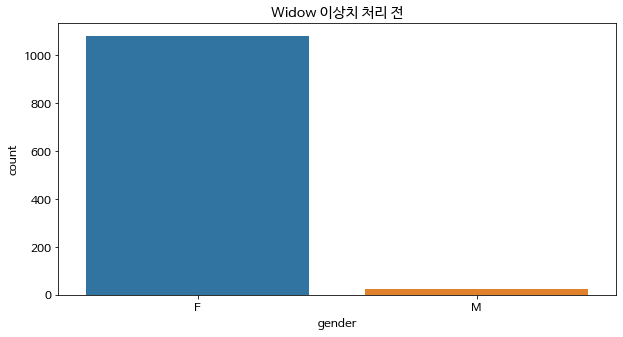

In [ ]:
print("이상치 처리 전")
print(df[(df['family_type']=='Widow')]['gender'].value_counts())

plt.figure(figsize=(10,5))
plt.title('Widow 이상치 처리 전')
sns.countplot(x='gender', data=df[df['family_type']=='Widow'])

In [ ]:
df.loc[(df['family_type']=='Widow') & (df['gender']=='M'),'gender'] = 'F'

이상치 처리 전
F    1103
Name: gender, dtype: int64


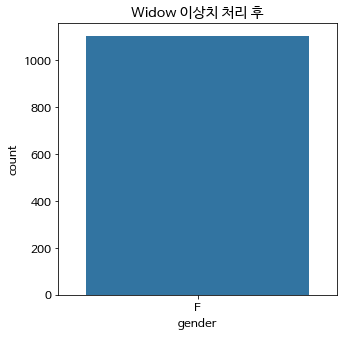

In [ ]:
print("이상치 처리 전")
print(df[(df['family_type']=='Widow')]['gender'].value_counts())

plt.figure(figsize=(5,5))
plt.title('Widow 이상치 처리 후')
sns.countplot(x='gender', data=df[df['family_type']=='Widow'])

In [ ]:
show = df[df['family_type']=='Widow'].groupby(['gender'])['index'].count().reset_index()
show.rename(columns ={'index':'count'})

,gender,count
0,F,1103


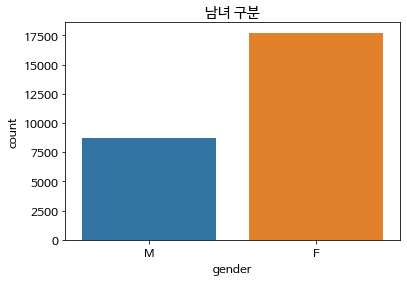

In [ ]:
df['gender'].value_counts()

# 결혼 유무 빈도는 수량화 할 수 없는 범주형 변수이다
ORDERING = ['M', 'F']
plt.figure()
plt.title('남녀 구분')

sns.countplot(x='gender', data=df, order=ORDERING)

In [ ]:
df.groupby(['family_type','gender'])['index'].count()

family_type           gender
Civil marriage        F          1476
                      M           647
Married               F         11556
                      M          6640
Separated             F          1225
                      M           314
Single / not married  F          2360
                      M          1136
Widow                 F          1103
Name: index, dtype: int64

In [ ]:
df['FLAG_MOBIL'].unique()

array([1])

In [ ]:
df[df['begin_month']>0]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


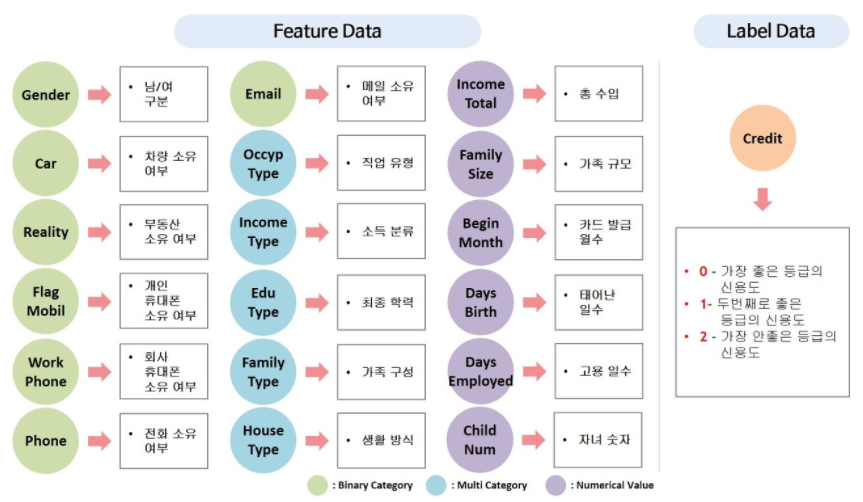

## EDA

In [ ]:
df['income_type'].unique()
# 결측치 없음

array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [ ]:
show = df.groupby(['gender'])['income_total'].mean().reset_index()
show.rename(columns={'income_total':'mean_income'})

,gender,mean_income
0,F,173158.791196
1,M,216000.336328


,credit,count
0,0.0,3222
1,1.0,6267
2,2.0,16968


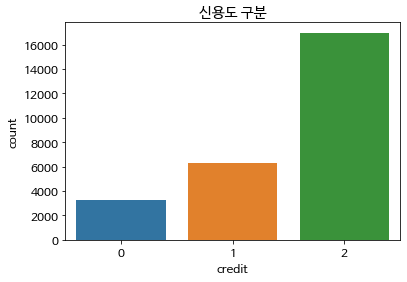

In [ ]:
# 결혼 유무 빈도는 수량화 할 수 없는 범주형 변수이다
show = df.groupby(['credit'])['index'].count().reset_index()
show.rename(columns={'index':'count'}, inplace=True)

ORDERING = [0, 1, 2]
plt.figure()
plt.title('신용도 구분')

sns.countplot(x='credit', data=df, order=ORDERING)
show

In [ ]:
df_copy = df
df_copy.loc[df_copy['credit']==1, ['credit']] = 0
df_copy.loc[df_copy['credit']==2, ['credit']] = 1

,credit,count
0,0.0,9489
1,1.0,16968


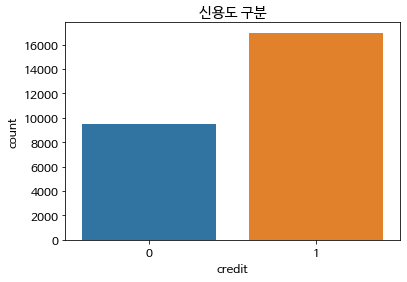

In [ ]:
# 결혼 유무 빈도는 수량화 할 수 없는 범주형 변수이다
show = df_copy.groupby(['credit'])['index'].count().reset_index()
show.rename(columns={'index':'count'}, inplace=True)

ORDERING = [0, 1]
plt.figure()
plt.title('신용도 구분')

sns.countplot(x='credit', data=df_copy, order=ORDERING)
show

,income_type,credit,count
0,Commercial associate,0.0,782
1,Commercial associate,1.0,1344
2,Commercial associate,2.0,4076
3,Pensioner,0.0,536
4,Pensioner,1.0,1084
5,Pensioner,2.0,2829
6,State servant,0.0,265
7,State servant,1.0,489
8,State servant,2.0,1400
9,Student,1.0,3


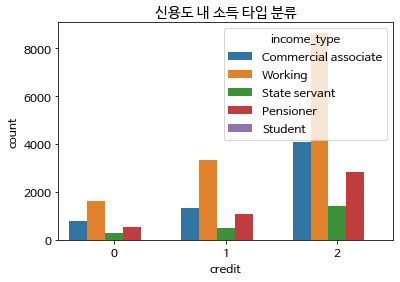

In [ ]:
show = df.groupby(['income_type','credit'])['index'].count().reset_index()
show.rename(columns={'index':'count'}, inplace=True)
show.set_index('income_type')
plt.figure()
plt.title('신용도 내 소득 타입 분류')
sns.countplot(x='credit', hue='income_type', data=df, order=ORDERING)
#credit 그룹별로 나눈 후 hue 미개변수를 이용하여 income_type 컬럼에 대한 하위 세부 그룹으로 또 분류신

# 신용도 0의 집단에서는 student가 없음

show

income_type           credit
Commercial associate  0.0        782
                      1.0       1344
                      2.0       4076
Pensioner             0.0        536
                      1.0       1084
                      2.0       2829
State servant         0.0        265
                      1.0        489
                      2.0       1400
Student               1.0          3
                      2.0          4
Working               0.0       1639
                      1.0       3347
                      2.0       8659
Name: index, dtype: int64


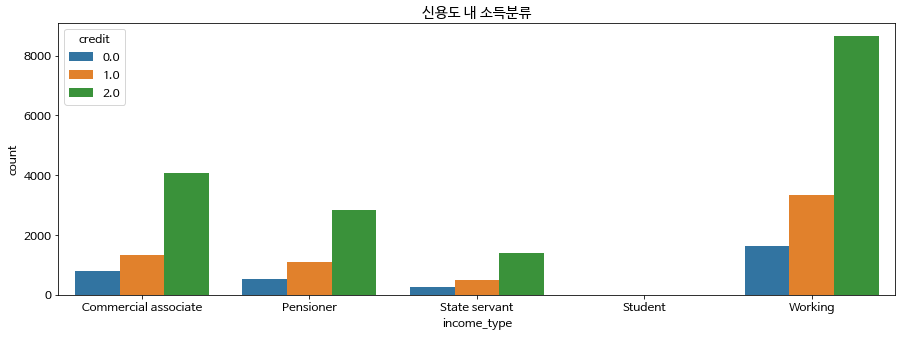

In [ ]:
result = df.groupby(['income_type','credit'])['index'].count()
print(result)

ORDERING = ['Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working']

plt.figure(figsize=(15,5))
plt.title('신용도 내 소득분류')
sns.countplot(x='income_type', hue='credit', data=df, order=ORDERING)
#credit 그룹별로 나눈 후 hue 미개변수를 이용하여 income_type 컬럼에 대한 하위 세부 그룹으로 또 분류신

# 신용도 0의 집단에서는 student가 없음

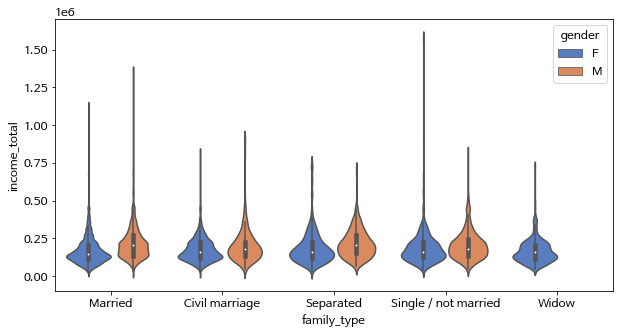

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x="family_type", y="income_total", hue="gender",data=df, palette="muted")

In [ ]:
# 신용도에 따른 begin_month 평균

- Income_type의 Student와 Edu_typedml Academic 값이 다른 값에 비해 현저하게 낮은 수치를 보여 유사 카테고리와 합치려 하였으나 분포가 크게 달라 합치지 못했음

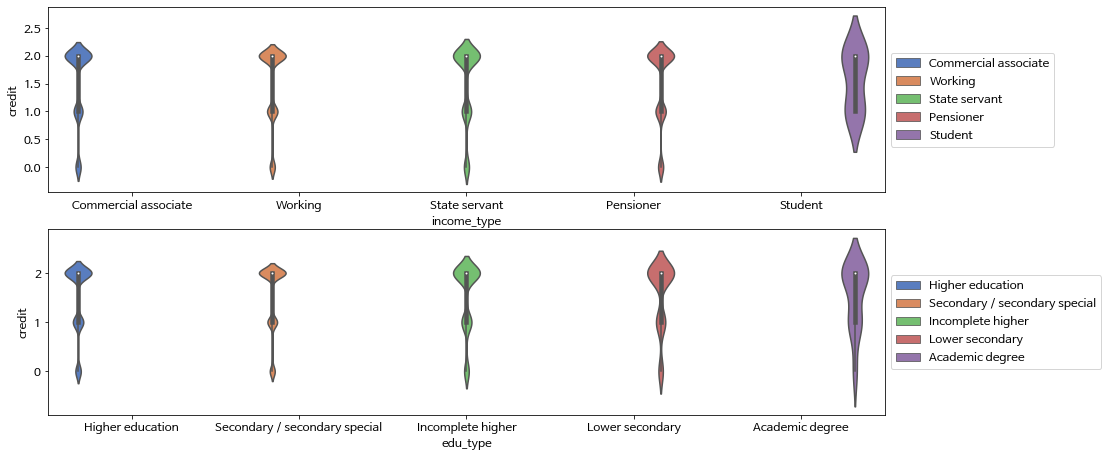

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=2,figsize=(15,7.5))
plt.figure(figsize=(15,5))
sns.violinplot(x="income_type", y="credit", hue="income_type",data=df, palette="muted",ax=ax1)
ax1.set_xlabel('income_type')
ax1.set_ylabel('credit')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.violinplot(x="edu_type", y="credit", hue="edu_type",data=df, palette="muted",ax=ax2)
ax2.set_xlabel('edu_type')
ax2.set_ylabel('credit')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

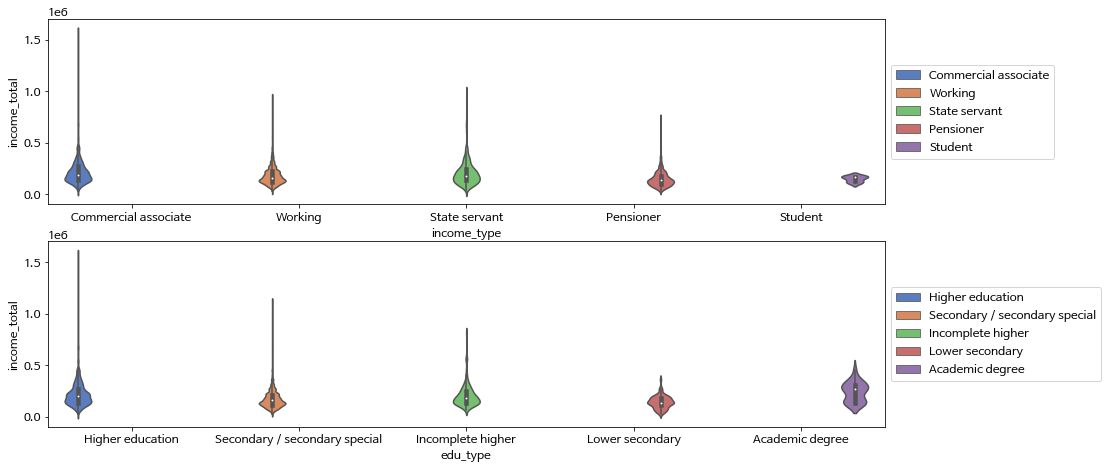

<Figure size 1080x360 with 0 Axes>

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=2,figsize=(15,7.5))
plt.figure(figsize=(15,5))
sns.violinplot(x="income_type", y="income_total", hue="income_type",data=df, palette="muted",ax=ax1)
ax1.set_xlabel('income_type')
ax1.set_ylabel('income_total')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.violinplot(x="edu_type", y="income_total", hue="edu_type",data=df, palette="muted",ax=ax2)
ax2.set_xlabel('edu_type')
ax2.set_ylabel('income_total')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0.5, 1.0, 'child_num >= 6')

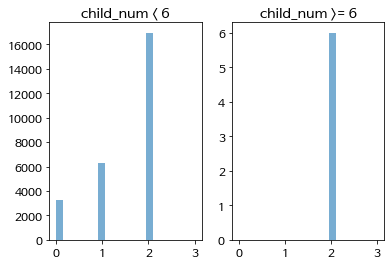

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
child_less_than_6 = df[df['child_num'] < 6].credit
child_more_than_6 = df[df['child_num'] >= 6].credit


axes[0].hist(child_less_than_6, range=(0,3), bins=20, alpha=0.6)
axes[1].hist(child_more_than_6, range=(0,3), bins=20, alpha=0.6)

axes[0].set_title('child_num < 6')
axes[1].set_title('child_num >= 6')

# child_num이 6명 이상인 경우 무조건 신용도 2

Text(0.5, 1.0, 'family_size >= 8')

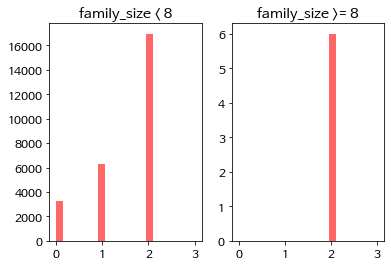

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
family_less_than_8 = df[df['family_size'] < 8].credit
family_more_than_8 = df[df['family_size'] >= 8].credit


axes[0].hist(family_less_than_8, range=(0,3), bins=20, alpha=0.6, color='r')
axes[1].hist(family_more_than_8, range=(0,3), bins=20, alpha=0.6,color='r')

axes[0].set_title('family_size < 8')
axes[1].set_title('family_size >= 8')

# family_size이 8명 이상인 경우 무조건 신용도 2

credit,0.0,1.0,2.0
chi-fam,,,
-2.0,2501.0,4679.0,13151.0
-1.0,721.0,1588.0,3811.0
0.0,0.0,0.0,5.0
1.0,0.0,0.0,1.0


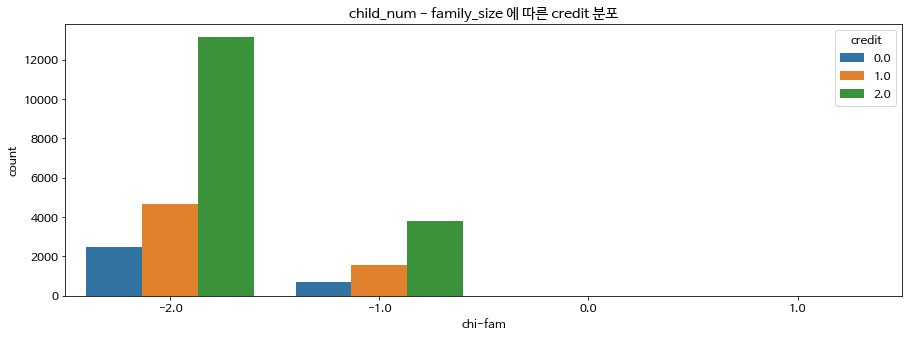

In [ ]:
df['chi-fam'] = df['child_num'] - df['family_size'] 
chartdata = df.groupby(['chi-fam','credit'])['index'].count().reset_index()
chartdata.rename(columns={'index':'count'}, inplace=True)

chartdata = chartdata.pivot(index = 'chi-fam',columns='credit', values = 'count')
chartdata = chartdata.fillna(0)

plt.figure(figsize=(15,5))
plt.title('child_num - family_size 에 따른 credit 분포')
sns.countplot(x='chi-fam', hue='credit', data=df) #order=ORDERING

chartdata

Text(0.5, 1.0, 'child_num - family_size > 0')

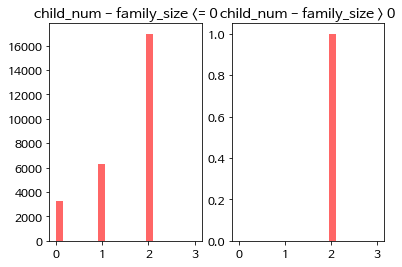

In [ ]:
df['chi-fam'] = df['child_num'] - df['family_size']

fig, axes = plt.subplots(nrows=1, ncols=2)
chi_fam_less_than_0 = df[df['chi-fam'] <= 0].credit
chi_fam_more_than_0 = df[df['chi-fam'] > 0].credit


axes[0].hist(chi_fam_less_than_0, range=(0,3), bins=20, alpha=0.6, color='r')
axes[1].hist(chi_fam_more_than_0, range=(0,3), bins=20, alpha=0.6,color='r')

axes[0].set_title('child_num - family_size <= 0')
axes[1].set_title('child_num - family_size > 0')


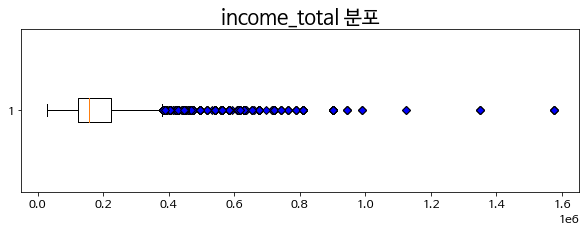

In [ ]:
plt.figure(figsize=(10,3))
green_diamond = dict(markerfacecolor='b', marker='D')
plt.title("income_total 분포",fontsize=20)
plt.boxplot(df['income_total'], vert=False, flierprops=green_diamond)
plt.show()

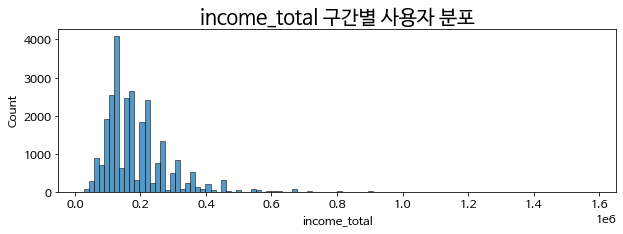

In [ ]:
plt.figure(figsize=(10,3))
sns.histplot(x=df['income_total'],bins=100)
plt.title("income_total 구간별 사용자 분포",fontsize=20)
plt.show()

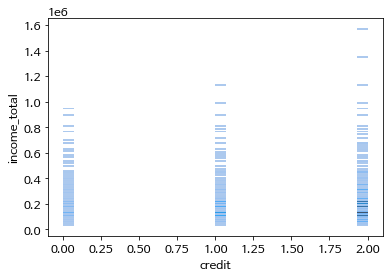

In [ ]:
sns.histplot(df, x="credit", y="income_total", element="poly")

In [ ]:
# credit 별 income_total 분포를 살펴봤을 때
df.groupby(['credit'])['income_total'].describe()

# 각 그룹별 하위 50%는 credit이 0인 집단이 더 높았지만
# max는 오히려 crdit 1,2인 집단이 더 높았음을 확인 할 수 있다.

,count,mean,std,min,25%,50%,75%,max
credit,,,,,,,,
0.0,3222.0,190807.582402,102139.548208,29250.0,126000.0,162000.0,225000.0,945000.0
1.0,6267.0,181122.701532,92548.262258,27000.0,117000.0,157500.0,225000.0,1125000.0
2.0,16968.0,188925.666991,104981.727565,27000.0,121500.0,157500.0,225000.0,1575000.0


In [ ]:
# 이상치를 제거해보고 다시 describe를 살펴봄
df_copy = df.copy()
for x in ['income_total']:
    q75,q25 = np.percentile(df_copy.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_copy.loc[df_copy[x] < min,x] = min
    df_copy.loc[df_copy[x] > max,x] = max

In [ ]:
# credit 별 income_total 분포를 살펴봤을 때
df_copy.groupby(['credit'])['income_total'].describe()

# 각 그룹별 하위 50%는 credit이 0인 집단이 더 높았지만
# max는 오히려 crdit 1,2인 집단이 더 높았음을 확인 할 수 있다.

,count,mean,std,min,25%,50%,75%,max
credit,,,,,,,,
0.0,3222.0,185254.509777,82918.399772,29250.0,126000.0,162000.0,225000.0,380250.0
1.0,6267.0,177519.613930,78813.358972,27000.0,117000.0,157500.0,225000.0,380250.0
2.0,16968.0,183049.022896,81963.662707,27000.0,121500.0,157500.0,225000.0,380250.0


In [ ]:
print("**************     이상치 제거 전 min~ max     **************")
print(df.groupby(['credit'])['income_total'].describe()[["min","max"]])

print("\n\n**************     이상치 제거 후 min~max     **************")
print(df_copy.groupby(['credit'])['income_total'].describe()[["min","max"]])

# 이상치 제거가 효과적이지 않았음 -> 이상치를 제거하지 않기로 함

**************     이상치 제거 전 min~ max     **************
            min        max
credit                    
0.0     29250.0   945000.0
1.0     27000.0  1125000.0
2.0     27000.0  1575000.0


**************     이상치 제거 후 min~max     **************
            min       max
credit                   
0.0     29250.0  380250.0
1.0     27000.0  380250.0
2.0     27000.0  380250.0


## Preprocessing

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,chi-fam
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,-2.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0,-2.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0,-2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0,-2.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0,-2.0


In [ ]:
############ 문자 -> 숫자 ############

#남자 0, 여자 1
df.loc[df['gender'] == 'M' , ['gender']] = 0
df.loc[df['gender'] == 'F' , ['gender']] = 1

# 차 소유 1, 무소유 0
df.loc[df['car'] == 'Y' , ['car']] = 1
df.loc[df['car'] == 'N' , ['car']] = 0

# 부동산 소유 1, 무소유 0
df.loc[df['reality'] == 'Y' , ['reality']] = 1
df.loc[df['reality'] == 'N' , ['reality']] = 0

# # 회사 휴대폰 소유 1, 무소유 0
# df.loc[df['work_phone'] == 'Y' , ['work_phone']] = 1
# df.loc[df['work_phone'] == 'N' , ['work_phone']] = 0

# # 가정용 휴대폰 소유 1, 무소유 0
# df.loc[df['phone'] == 'Y' , ['phone']] = 1
# df.loc[df['phone'] == 'N' , ['phone']] = 0

In [ ]:
df.loc[pd.isna(df['occyp_type'])]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,chi-fam
0,0,1,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0,-2.0
8,8,0,1,1,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0,-2.0
14,14,1,0,1,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0,-1.0
18,18,1,0,1,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0,-2.0
19,19,1,0,1,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,1,0,1,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0,-2.0
26441,26441,1,0,1,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0,-1.0
26443,26443,1,0,1,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0,-1.0
26449,26449,1,0,0,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0,-2.0


In [ ]:
# occyp_type, house_type, family_type, income_type =====> Label Encoding

#NaN 값이 있으면 LabelEncoding이 불가하기 때문에 문자형 NaN값으로 변환
df.loc[pd.isna(df['occyp_type']),['occyp_type']]='NaN'


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['occyp_type_le'] = le.fit_transform(df['occyp_type'])
df['house_type_le'] = le.fit_transform(df['house_type'])
df['family_type_le'] = le.fit_transform(df['family_type'])
df['income_type_le'] = le.fit_transform(df['income_type'])

In [ ]:
# edu_type ===========> Ordinal Encoding

edu_dict = {'Lower secondary':0,  'Secondary / secondary special':0,
            'Incomplete higher':1,
            'Higher education':2, 'Academic degree':2}

df['edu_type_le'] = df.edu_type.map(edu_dict)

In [ ]:
print( df[df['chi-fam']>0][['child_num', 'family_size']] )

# child num - family size가 양수인 경우를 0으로 치환
df.loc[df['chi-fam'] > 0 , ['chi-fam']] = 0

print( df[df['chi-fam']>0][['child_num', 'family_size']] )

In [ ]:
df.FLAG_MOBIL.unique()
#모든 값이 1임 -> feature로서 유의미하지 않음 

#개인 휴대폰 소유 여부를 의미하는 FLAG_MOBIL 삭제
df.drop(columns='FLAG_MOBIL', inplace= True )

In [ ]:
# 마지막으로 고용되어 일한 날짜를 음수로 표기한 컬럼인 DAYS_EMPLOYED가 양수라면 현재 무직을 의미 다 0으로 변환
df.loc[df['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

In [ ]:
# DAYS_BIRTH, DAYS_EMPLOYED 는 days 기준으로 되어 있기 때문에 month, year로 변경하여 데이터 범위를 줄여줌

# 음수값인 변수 절댓값 취해서 양수로 변환

feats = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for feat in feats:
    df[feat]=np.abs(df[feat])

df['Age'] = df['DAYS_BIRTH']//365
df['career_year'] = np.ceil(df['DAYS_EMPLOYED']/365)
df['career_start_age'] = df['Age'] - df['career_year']

In [ ]:
# 신용카드 갯수
distinct_bigin_month_df = df.groupby(['gender', 'car', 'reality', 'child_num', 'income_total','income_type', 'edu_type', 'family_type', 
            'house_type', 'DAYS_BIRTH','DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type','family_size'])['begin_month'].count().reset_index()
distinct_bigin_month_df.rename(columns={'begin_month': "card_count"}, inplace=True)



# 신용 변화 횟수
distinct_credit_df = df.groupby(['gender', 'car', 'reality', 'child_num', 'income_total','income_type', 'edu_type', 'family_type', 
            'house_type', 'DAYS_BIRTH','DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type','family_size'])['credit'].nunique().reset_index()
distinct_credit_df.rename(columns={'credit': "credit_change_count"}, inplace=True)


# 해당 고객의 신용카드 갯수와 신용 변화 횟수 컬럼 생성
distinct_df = pd.merge(distinct_bigin_month_df,distinct_credit_df, on =['gender', 'car', 'reality', 'child_num', 'income_total','income_type', 'edu_type', 'family_type', 
            'house_type', 'DAYS_BIRTH','DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type','family_size'], how= 'inner' )

In [ ]:
# 신용카드 갯수가 여러개이고 신용변화 횟수가 있었던 한 고객을 조회해봄
show = df[ (df['gender']==1) & (df['car']==1) & (df['reality']==1) & (df['reality']==1) & (df['child_num']==4) & (df['income_total']==112500.0) & 
   (df['income_type']=='Working') & (df['edu_type']=='Higher education') & (df['family_type']=='Married') & (df['house_type']=='House / apartment') 
   & (df['DAYS_BIRTH']==13671) & (df['DAYS_EMPLOYED']==1974) & (df['work_phone']==0) &  (df['phone']==0) &  (df['email']==0) &
  (df['occyp_type']=='Core staff') & (df['family_size']==6.0)]

show.sort_values(by='begin_month', inplace = True)
show.iloc[:,17: ]
### begin_month가 제일 작은 row의 credit을 반영하기로 함

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age
3134,7.0,1.0,-2.0,3,1,1,4,2,37,6.0,31.0
342,12.0,0.0,-2.0,3,1,1,4,2,37,6.0,31.0
4118,12.0,1.0,-2.0,3,1,1,4,2,37,6.0,31.0
7195,35.0,2.0,-2.0,3,1,1,4,2,37,6.0,31.0
9895,42.0,2.0,-2.0,3,1,1,4,2,37,6.0,31.0
13677,42.0,0.0,-2.0,3,1,1,4,2,37,6.0,31.0
22155,49.0,0.0,-2.0,3,1,1,4,2,37,6.0,31.0


In [ ]:
show.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit', 'chi-fam', 'occyp_type_le',
       'house_type_le', 'family_type_le', 'income_type_le', 'edu_type_le',
       'Age', 'career_year', 'career_start_age'],
      dtype='object')

In [ ]:
# 중복 행 제거
sorted_df = df.sort_values(by='begin_month' ,ascending=False)
sorted_df.drop_duplicates(['gender', 'car', 'reality', 'child_num', 'income_total','income_type', 'edu_type', 
                    'family_type', 'house_type', 'DAYS_BIRTH','DAYS_EMPLOYED', 'work_phone', 'phone', 
                    'email', 'occyp_type','family_size'], keep = 'last', inplace=True)

In [ ]:
# 제대로 잘 뽑히는 지 확인해

sorted_df[ (sorted_df['gender']==1) & (sorted_df['car']==1) & (sorted_df['reality']==1) & (sorted_df['reality']==1) & (sorted_df['child_num']==4) & (sorted_df['income_total']==112500.0) & 
   (sorted_df['income_type']=='Working') & (sorted_df['edu_type']=='Higher education') & (sorted_df['family_type']=='Married') & (sorted_df['house_type']=='House / apartment') 
   & (sorted_df['DAYS_BIRTH']==13671) & (sorted_df['DAYS_EMPLOYED']==1974) & (sorted_df['work_phone']==0) &  (sorted_df['phone']==0) &  (sorted_df['email']==0) &
  (sorted_df['occyp_type']=='Core staff') & (sorted_df['family_size']==6.0)]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age
3134,3134,1,1,1,4,112500.0,Working,Higher education,Married,House / apartment,13671,1974,0,0,0,Core staff,6.0,7.0,1.0,-2.0,3,1,1,4,2,37,6.0,31.0


In [ ]:
# 해당 고객의 신용카드 갯수와 신용 변화 횟수 컬럼 생성
final_df = pd.merge(sorted_df,distinct_df, on =['gender', 'car', 'reality', 'child_num', 'income_total','income_type', 'edu_type', 'family_type', 
            'house_type', 'DAYS_BIRTH','DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type','family_size'], how= 'inner' )

In [ ]:
final_df.to_csv("yj_final_df.csv")

In [ ]:
final_df

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,chi-fam,occyp_type_le,house_type_le,family_type_le,income_type_le,edu_type_le,Age,career_year,career_start_age,card_count,credit_change_count
0,17940,1,1,0,0,382500.0,Working,Higher education,Civil marriage,House / apartment,11153,1281,1,1,0,Accountants,2.0,60.0,2.0,-2.0,0,1,0,4,2,30,4.0,26.0,1,1
1,20390,1,0,1,1,67500.0,Working,Secondary / secondary special,Married,With parents,15964,385,0,0,0,Sales staff,3.0,60.0,2.0,-2.0,15,5,1,4,0,43,2.0,41.0,1,1
2,24612,1,0,1,3,180000.0,State servant,Higher education,Married,House / apartment,11627,1449,1,0,0,NaN,5.0,60.0,2.0,-2.0,12,1,1,2,2,31,4.0,27.0,1,1
3,17577,0,1,0,3,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,15262,1674,0,0,0,Managers,5.0,60.0,2.0,-2.0,10,1,1,0,0,41,5.0,36.0,1,1
4,18174,1,0,0,1,225000.0,Working,Secondary / secondary special,Separated,House / apartment,11509,3506,0,0,0,Laborers,2.0,60.0,2.0,-1.0,8,1,2,4,0,31,10.0,21.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,15259,0,1,1,0,135000.0,Working,Higher education,Married,House / apartment,9075,614,1,1,0,Sales staff,2.0,0.0,0.0,-2.0,15,1,1,4,2,24,2.0,22.0,5,3
8755,18567,1,1,0,2,162000.0,Commercial associate,Incomplete higher,Married,House / apartment,9662,796,1,1,0,Core staff,4.0,0.0,0.0,-2.0,3,1,1,0,1,26,3.0,23.0,6,2
8756,18587,0,0,1,1,81000.0,Working,Secondary / secondary special,Married,House / apartment,12313,1098,0,0,0,Laborers,3.0,0.0,1.0,-2.0,8,1,1,4,0,33,4.0,29.0,3,2
8757,21397,1,0,1,0,202500.0,Working,Secondary / secondary special,Separated,House / apartment,18939,12179,0,0,0,Laborers,1.0,0.0,1.0,-1.0,8,1,2,4,0,51,34.0,17.0,5,3
